<a href="https://colab.research.google.com/github/Aayush6377/Machine-Learning-Lab-programs-Sem-6/blob/main/Lab_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Random Forest Classifier to predict Diabetes prediction on PIMA Diabetes database**

In [25]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
#Load PIMA dataset
df=pd.read_csv('/content/diabetes.csv')
print(df.iloc[:,:5])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin
0              6      148             72             35        0
1              1       85             66             29        0
2              8      183             64              0        0
3              1       89             66             23       94
4              0      137             40             35      168
..           ...      ...            ...            ...      ...
763           10      101             76             48      180
764            2      122             70             27        0
765            5      121             72             23      112
766            1      126             60              0        0
767            1       93             70             31        0

[768 rows x 5 columns]


In [11]:
#Removing Outcome feature and spliting the data
x=df.drop('Outcome',axis=1)
y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train: \n",x_train.iloc[:5,:5])
print("x_test: \n",x_test.iloc[:5,:5])
print("y_train: \n",y_train.head())
print("y_test: \n",y_test.head())

x_train: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin
60             2       84              0              0        0
618            9      112             82             24        0
346            1      139             46             19       83
294            0      161             50              0        0
231            6      134             80             37      370
x_test: 
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin
668            6       98             58             33      190
324            2      112             75             32        0
624            2      108             64              0        0
690            8      107             80              0        0
473            7      136             90              0        0
y_train: 
 60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64
y_test: 
 668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64


In [22]:
#Initialize and train the model
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [23]:
#Predicting values
y_pred=model.predict(x_test)
print("y_test: ",np.array(y_test))
print("y_pred: ",y_pred)

y_test:  [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0]
y_pred:  [0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [32]:
#Accuracy & Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7207792207792207

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



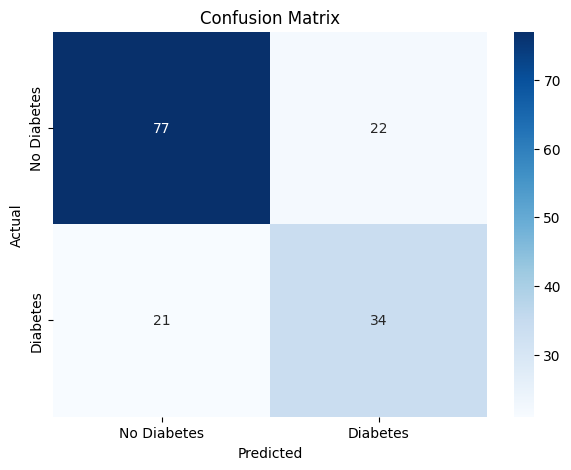

In [35]:
#Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


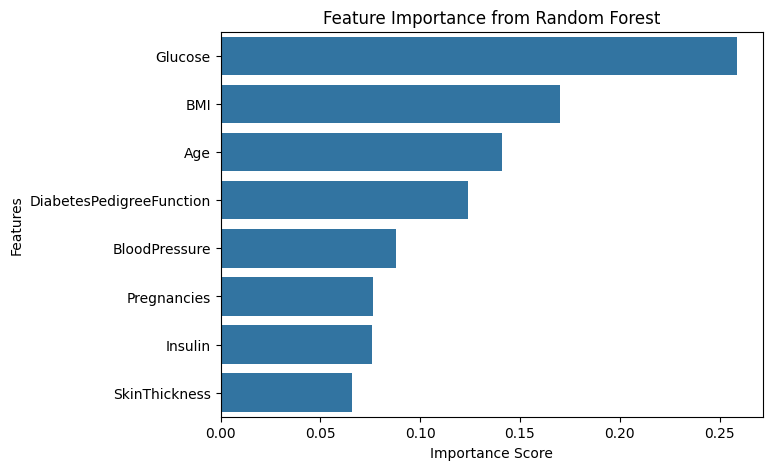

In [34]:
#Feature Importance Visualization
feature_importances = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()